In [134]:
# using tf-idf vectorizer in sample dataset 
sample_dataset = [
    "Here comes the man",
    "The man, the myth, the legend",
    "The goat, and the one person competition revolves around",
    "Final showdown in the history of the world",
    "Enjoy your time!"
]
type(sample_dataset) 

list

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np 
import matplotlib.pyplot as plt 
import string 

tfidf = TfidfVectorizer(stop_words=None)
tfidf 

TfidfVectorizer()

In [207]:
vect = tfidf.fit(sample_dataset)
vect.idf_.shape, vect.idf_ 

((22,),
 array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
        2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
        2.09861229, 1.69314718, 2.09861229, 2.09861229, 2.09861229,
        2.09861229, 2.09861229, 2.09861229, 1.18232156, 2.09861229,
        2.09861229, 2.09861229]))

In [200]:
tfidf_dense = tfidf.fit_transform(sample_dataset) 
feature_names = tfidf.get_feature_names_out() 
tfidf_dense.shape 

(5, 22)

In [160]:
len(feature_names) 

22

In [161]:
type(tfidf_dense)

scipy.sparse._csr.csr_matrix

In [162]:
mat = tfidf_dense.todense()
mat.shape  

(5, 22)

In [163]:
feature_names

array(['and', 'around', 'comes', 'competition', 'enjoy', 'final', 'goat',
       'here', 'history', 'in', 'legend', 'man', 'myth', 'of', 'one',
       'person', 'revolves', 'showdown', 'the', 'time', 'world', 'your'],
      dtype=object)

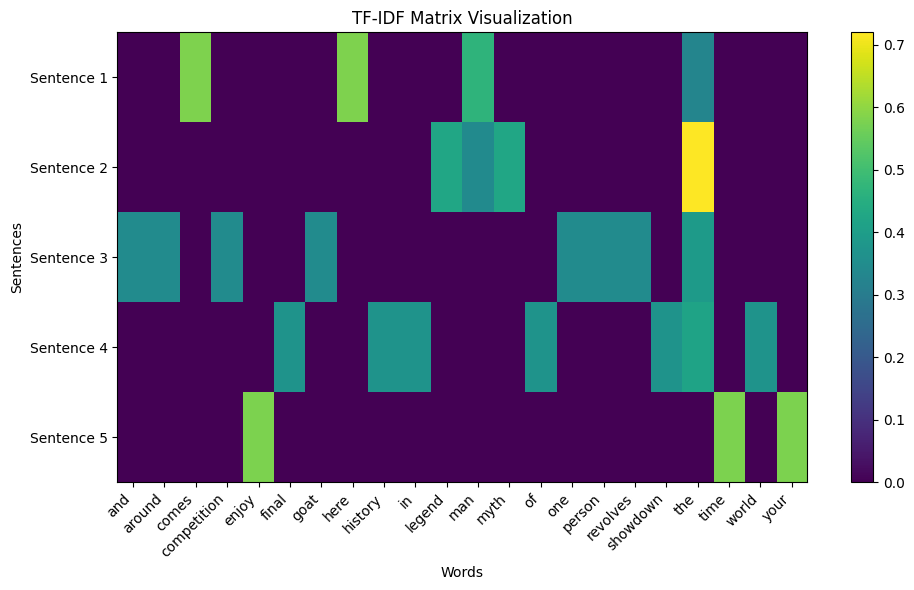

In [164]:
# Visualize
plt.figure(figsize=(10, 6))
plt.imshow(mat, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45, ha='right')
plt.yticks(np.arange(len(sample_dataset)), ['Sentence {}'.format(i+1) for i in range(len(sample_dataset))])
plt.xlabel('Words')
plt.ylabel('Sentences')
plt.title('TF-IDF Matrix Visualization')
plt.tight_layout()
plt.show()

## Conclusion from the heatmap 

- Words wit high TF-IDF scores are those that are frequent in a document but rare in other documents
- score indicates importance in that specific document 

# With NumPy only 

## TF 

In [165]:
def term_freq(doc):
    total_terms = sum(len(d.split()) for d in doc)
    print(total_terms)
    tf = {}
    for sentence in doc:
        # getting all words from the sentences as a list 
        for word in sentence.split(): 
            try:
                tf[word] = tf[word] + 1 
            except: 
                tf[word] = 1 
    tf = {key:value/total_terms for key, value in tf.items()}  
    return tf 

In [166]:
# removing punctuation from the sentences 
translator = str.maketrans('', '', string.punctuation)
sample_dataset = [sentence.translate(translator) for sentence in sample_dataset]
sample_dataset = [sentence.lower() for sentence in sample_dataset]
TF = term_freq(sample_dataset)
len(TF)

30


22

In [167]:
TF 

{'here': 0.03333333333333333,
 'comes': 0.03333333333333333,
 'the': 0.26666666666666666,
 'man': 0.06666666666666667,
 'myth': 0.03333333333333333,
 'legend': 0.03333333333333333,
 'goat': 0.03333333333333333,
 'and': 0.03333333333333333,
 'one': 0.03333333333333333,
 'person': 0.03333333333333333,
 'competition': 0.03333333333333333,
 'revolves': 0.03333333333333333,
 'around': 0.03333333333333333,
 'final': 0.03333333333333333,
 'showdown': 0.03333333333333333,
 'in': 0.03333333333333333,
 'history': 0.03333333333333333,
 'of': 0.03333333333333333,
 'world': 0.03333333333333333,
 'enjoy': 0.03333333333333333,
 'your': 0.03333333333333333,
 'time': 0.03333333333333333}

In [197]:
def inverse_term_freq(doc):
    #total number of documents
    total_doc = len(doc) 
    all_words = [word for sentence in doc for word in sentence.split()]
    idf = {}
    for word in list(set(all_words)):
        for sentence in doc:
            if word in sentence:
                try:
                    idf[word] += 1
                except: 
                    idf[word] = 1
    print(idf, total_doc)
    idf = {key:np.log(total_doc/value) for key, value in idf.items()}  
    return idf 

In [208]:
IDF = inverse_term_freq(sample_dataset) 
len(IDF), IDF  

{'here': 1, 'around': 1, 'revolves': 1, 'and': 1, 'person': 1, 'your': 1, 'one': 1, 'time': 1, 'goat': 1, 'comes': 1, 'man': 2, 'world': 1, 'legend': 1, 'history': 1, 'final': 1, 'competition': 1, 'in': 1, 'of': 1, 'showdown': 1, 'the': 4, 'myth': 1, 'enjoy': 1} 5


(22,
 {'here': 1.6094379124341003,
  'around': 1.6094379124341003,
  'revolves': 1.6094379124341003,
  'and': 1.6094379124341003,
  'person': 1.6094379124341003,
  'your': 1.6094379124341003,
  'one': 1.6094379124341003,
  'time': 1.6094379124341003,
  'goat': 1.6094379124341003,
  'comes': 1.6094379124341003,
  'man': 0.9162907318741551,
  'world': 1.6094379124341003,
  'legend': 1.6094379124341003,
  'history': 1.6094379124341003,
  'final': 1.6094379124341003,
  'competition': 1.6094379124341003,
  'in': 1.6094379124341003,
  'of': 1.6094379124341003,
  'showdown': 1.6094379124341003,
  'the': 0.22314355131420976,
  'myth': 1.6094379124341003,
  'enjoy': 1.6094379124341003})

In [170]:
TF_IDF = {word:TF[word] * IDF[word] for word in TF} 
len(TF_IDF)

22

In [171]:
feature_names_ = list(set([word for sentence in sample_dataset
                          for word in sentence.split()]))
len(feature_names_), feature_names_[:3]

(22, ['here', 'around', 'revolves'])

In [172]:
feature_names, feature_names_

(array(['and', 'around', 'comes', 'competition', 'enjoy', 'final', 'goat',
        'here', 'history', 'in', 'legend', 'man', 'myth', 'of', 'one',
        'person', 'revolves', 'showdown', 'the', 'time', 'world', 'your'],
       dtype=object),
 ['here',
  'around',
  'revolves',
  'and',
  'person',
  'your',
  'one',
  'time',
  'goat',
  'comes',
  'man',
  'world',
  'legend',
  'history',
  'final',
  'competition',
  'in',
  'of',
  'showdown',
  'the',
  'myth',
  'enjoy'])

19

In [187]:
tfidf_mat = np.zeros((len(sample_dataset), len(feature_names)))
tfidf_mat.shape 
for i, sentence in enumerate(sample_dataset):
    for j, word in enumerate(sentence.split()):
        if word in TF_IDF:
            tfidf_mat[i, feature_names_.index(word)] = TF_IDF[word]

In [188]:
mat.shape, tfidf_mat.shape 

((5, 22), (5, 22))

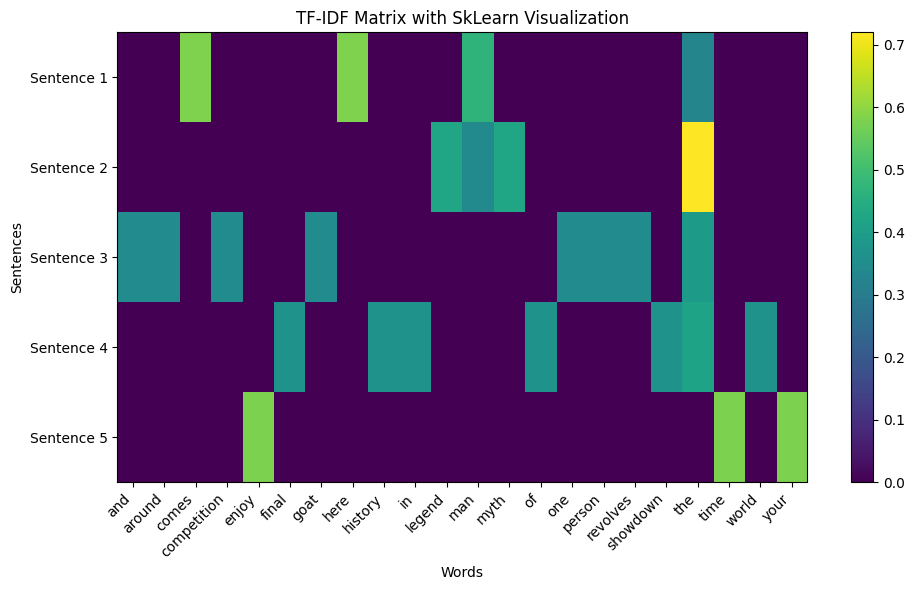

In [210]:
sorted_feature_names = sorted(feature_names)

# Visualize
plt.figure(figsize=(10, 6))
plt.imshow(mat, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(sorted_feature_names)), sorted_feature_names, rotation=45, ha='right')
plt.yticks(np.arange(len(sample_dataset)), ['Sentence {}'.format(i+1) for i in range(len(sample_dataset))])
plt.xlabel('Words')
plt.ylabel('Sentences')
plt.title('TF-IDF Matrix with SkLearn Visualization')
plt.tight_layout()
plt.show()

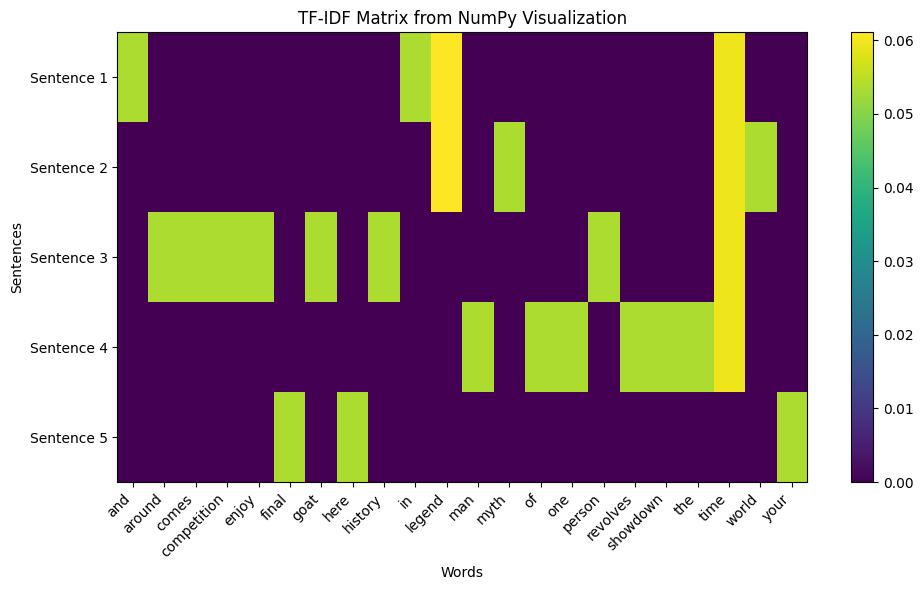

In [211]:
sorted_feature_names_ = sorted(feature_names_)

# Visualize
plt.figure(figsize=(10, 6))
plt.imshow(tfidf_mat, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(sorted_feature_names_)), sorted_feature_names_, rotation=45, ha='right')
plt.yticks(np.arange(len(sample_dataset)), ['Sentence {}'.format(i+1) for i in range(len(sample_dataset))])
plt.xlabel('Words')
plt.ylabel('Sentences')
plt.title('TF-IDF Matrix from NumPy Visualization')
plt.tight_layout()
plt.show()

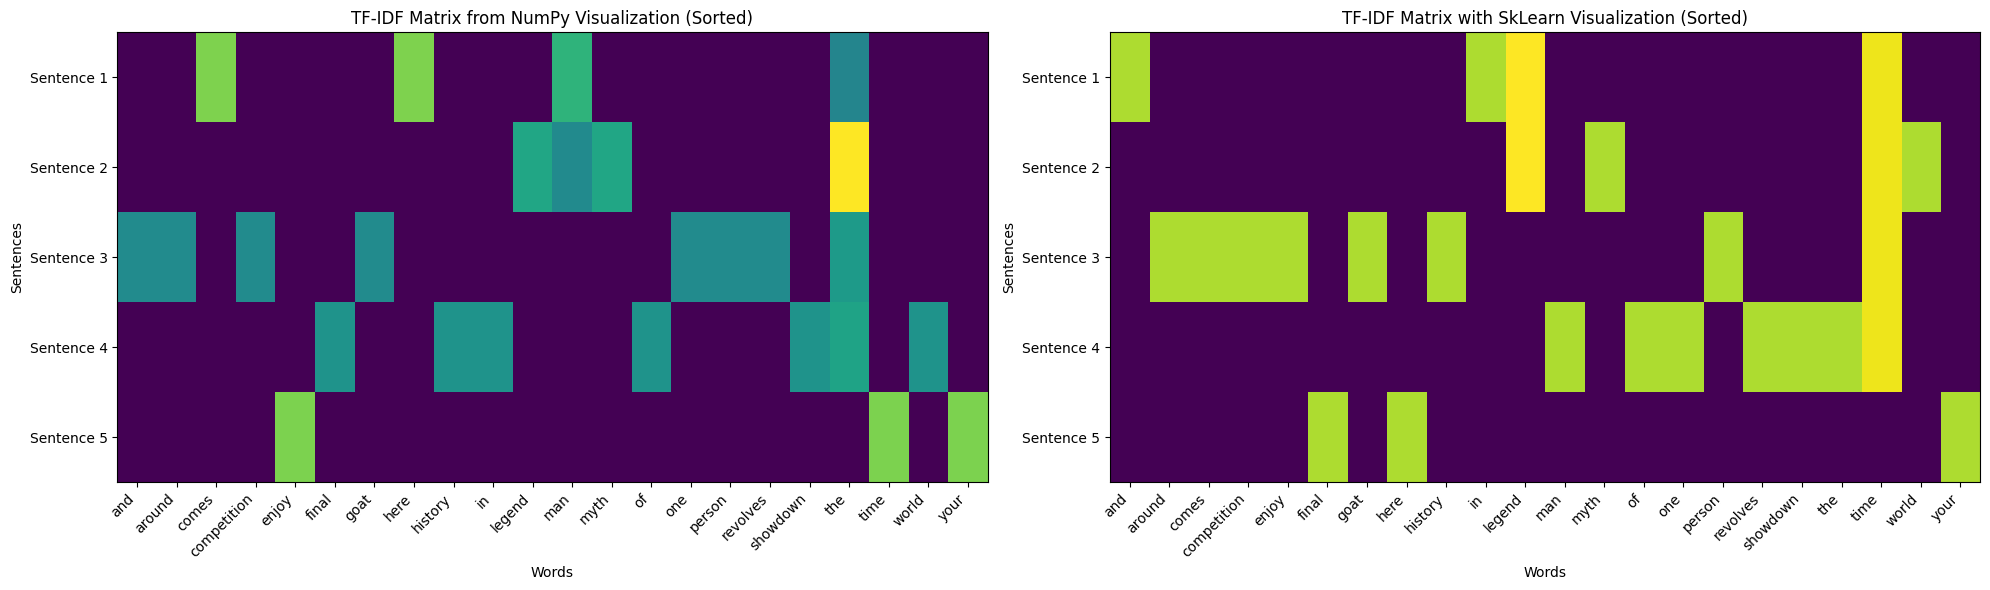

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# TF-IDF Matrix with SkLearn
axes[1].imshow(tfidf_mat, cmap='viridis', aspect='auto')
axes[1].set_title('TF-IDF Matrix with SkLearn Visualization (Sorted)')
axes[1].set_xticks(np.arange(len(sorted_feature_names)))
axes[1].set_xticklabels(sorted_feature_names, rotation=45, ha='right')
axes[1].set_yticks(np.arange(len(sample_dataset)))
axes[1].set_yticklabels(['Sentence {}'.format(i+1) for i in range(len(sample_dataset))])
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Sentences')
axes[1].grid(False)

# TF-IDF Matrix from NumPy 
axes[0].imshow(mat, cmap='viridis', aspect='auto')
axes[0].set_title('TF-IDF Matrix from NumPy Visualization (Sorted)')
axes[0].set_xticks(np.arange(len(sorted_feature_names_)))
axes[0].set_xticklabels(sorted_feature_names_, rotation=45, ha='right')
axes[0].set_yticks(np.arange(len(sample_dataset)))
axes[0].set_yticklabels(['Sentence {}'.format(i+1) for i in range(len(sample_dataset))])
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Sentences')
axes[0].grid(False)


plt.tight_layout()
plt.show()

In [214]:
sample_dataset

['here comes the man',
 'the man the myth the legend',
 'the goat and the one person competition revolves around',
 'final showdown in the history of the world',
 'enjoy your time']

In [215]:
TF_IDF['time'] 

0.05364793041447001

## Some mistakes in the order of words and the matrices, present words have 0 TF-IDF which should not be the case. 